In [2]:
#IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

import torchvision

c:\Users\blubo\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
inputChannels = 3
NDF = 64 #num discriminator features
#DEFINE MODEL

def initilize_weights(layer):
  layer_name = layer.__class__.__name__
  if layer_name.find("Conv") != -1:
    nn.init.normal_(layer.weight.data, 0, 0.02)
  if layer_name.find("BatchNorm") != -1:
    nn.init.normal_(layer.weight.data, 1, 0.02)
    nn.init.constant_(layer.bias.data, 0)

noiseChannels = 100
NGF = 64
class Generator(nn.Module):
  def __init__(self):
    super(Generator, self).__init__()

    self.block1 = nn.Sequential(nn.ConvTranspose2d(noiseChannels, NGF*8, 4, 1, 0, bias = False), nn.BatchNorm2d(NGF*8), nn.ReLU())
    self.block2 = nn.Sequential(nn.ConvTranspose2d(NGF*8, NGF*4, 4, 2, 1, bias = False), nn.BatchNorm2d(NGF*4), nn.ReLU(), nn.Conv2d(NGF*4, NGF*4, 3, 1, 1, bias = False), nn.BatchNorm2d(NGF*4), nn.ReLU())
    self.block3 = nn.Sequential(nn.ConvTranspose2d(NGF*4, NGF*2, 4, 2, 1, bias = False), nn.BatchNorm2d(NGF*2), nn.ReLU(), nn.Conv2d(NGF*2, NGF*2, 3, 1, 1, bias = False), nn.BatchNorm2d(NGF*2), nn.ReLU())
    self.block4 = nn.Sequential(nn.ConvTranspose2d(NGF*2, NGF, 4, 2, 1, bias = False), nn.BatchNorm2d(NGF), nn.ReLU(), nn.Conv2d(NGF, NGF, 3, 1, 1, bias = False), nn.BatchNorm2d(NGF), nn.ReLU())
    self.block5 = nn.Sequential(nn.ConvTranspose2d(NGF, inputChannels, 4, 2, 1, bias = False), nn.Tanh())

  def forward(self, x):
    x = self.block1(x)
    #print("GEN", x.shape)
    x = self.block2(x)
    #print("GEN", x.shape)
    x = self.block3(x)
    #print("GEN", x.shape)
    x = self.block4(x)
    #print("GEN", x.shape)
    x = self.block5(x)
    #print("-------------------------")
    return x

In [4]:
noiseChannels = 100
model = torch.load("./genSave.model")
model.eval()

Generator(
  (block1): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (block2): Sequential(
    (0): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (block3): Sequential(
    (0): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm2d(128, eps

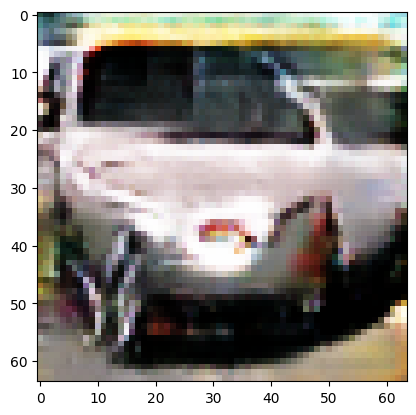

In [15]:
output = (model(torch.randn(1, noiseChannels, 1, 1, device = "cuda")).cpu().detach()[0].permute([1, 2, 0]) + 1) / 2
plt.imshow(output)